1)Оценить  En(ξ)  с помощью МСМС для графа 8х8

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def metroplis(start, value, proposal, niter, sigma, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, sigma, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [95]:
def value(G, **kwargs):
    _ = kwargs
    G=G.reshape(8,8)
    for i in range(7):
        if G[i:i+2,:].sum(axis=0).max()>1:
            return 0
    for i in range(7):
        if G[:,i:i+2].sum(axis=1).max()>1:
            return 0
    return 1

In [96]:
def proposal(G, sigma, **kwargs):
    _ = kwargs
    G = np.asarray(G, dtype=np.int32)
    sigma = np.asarray(sigma)
    F=np.random.choice([0, 1], size=64, p=[1-sigma, sigma])
    G=(G + F)%2
    #print(value(G, **kwargs))
    #print(F)
    return G

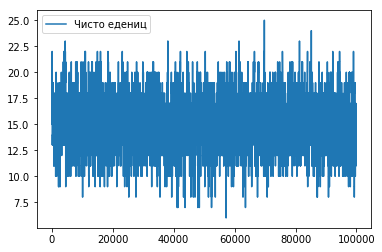

In [97]:
start=np.zeros(64)
V=metroplis(start, value, proposal,100000 , 0.05,100)
M=np.zeros(len(V))
for i in range(len(V)):
    M[i]=V[i].sum()
plt.plot(M, label='Чисто едениц')
plt.legend()
plt.show()

In [98]:
M[-10000:].sum()/len(M[-10000:])

15.1177

Таким образом En(ξ) примерно равно 15.4238

2)Обосновать численно и графически стационарность

Мы сделаем это применив Gewerke test:

In [99]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

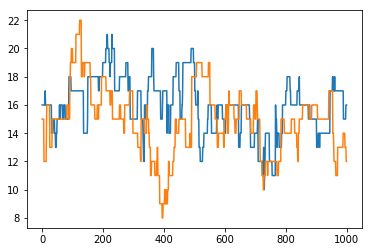

Ttest_indResult(statistic=1.0843611028848712, pvalue=0.2782225827614647)

In [103]:
plt.plot(M[8000:9000])
plt.plot(M[-1000:])
plt.show()

g_test(M)

3)Построить график распределеиня  n(ξ)

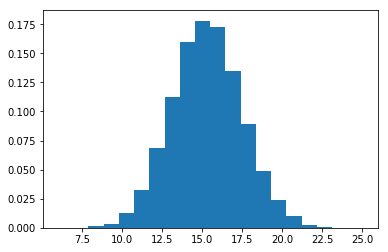

In [113]:
plt.hist(M, bins=20, density=True)
plt.show()

4)образить раскраску для одного из случайных графов, взятых из стационарного распределения.

In [135]:
V0=V[np.random.choice(np.arange(len(V)))]
V0.reshape(8,8)

array([[0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0]], dtype=int32)

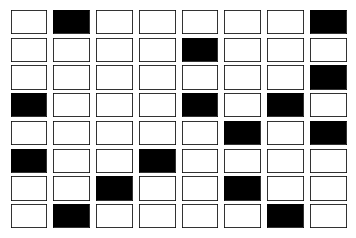

In [136]:
fig, axes = plt.subplots(nrows = 8, ncols =8 )
for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
i=0
for ax in axes.flat:
    if(V0[i]==1):
        ax.set_facecolor('black')
    i+=1